In [2]:
import pyspedas
import pytplot

In [3]:
swe_vars = pyspedas.wind.swe(trange=['2003-11-20','2003-11-21'],datatype='h1',varnames=['BX','BY','BZ','Proton_Np_moment','Proton_Wpar_moment'],downloadonly=False)

08-Apr-24 14:49:58: File is current: wind_data/wind_masters/wi_h1_swe_00000000_v01.cdf
08-Apr-24 14:49:58: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2003/
08-Apr-24 14:49:59: File is current: wind_data/swe/swe_h1/2003/wi_h1_swe_20031120_v01.cdf
08-Apr-24 14:49:59: Using new version of cdflib (1.2.6)
08-Apr-24 14:49:59: c:\Users\USER\anaconda3\envs\swe-ip\Lib\site-packages\pytplot\store_data.py:234: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  temp = xr.DataArray(values, dims=['time']+dimension_list,



In [17]:
swe_vars

['BX', 'BY', 'BZ', 'Proton_Np_moment', 'Proton_Wpar_moment']

In [13]:
pytplot.store_data("Bmag",['BX','BY','BZ'])
pytplot.options("BX",'color','red')
pytplot.options("BY",'color','blue')
pytplot.options("BZ",'color','green')
pytplot.options("Bmag","ytitle",r'$B_{vec}$')

pytplot.options("BX", 'legend_names', 'BX')
pytplot.options("BY", 'legend_names', 'BY')
pytplot.options("BZ", 'legend_names', 'BZ')

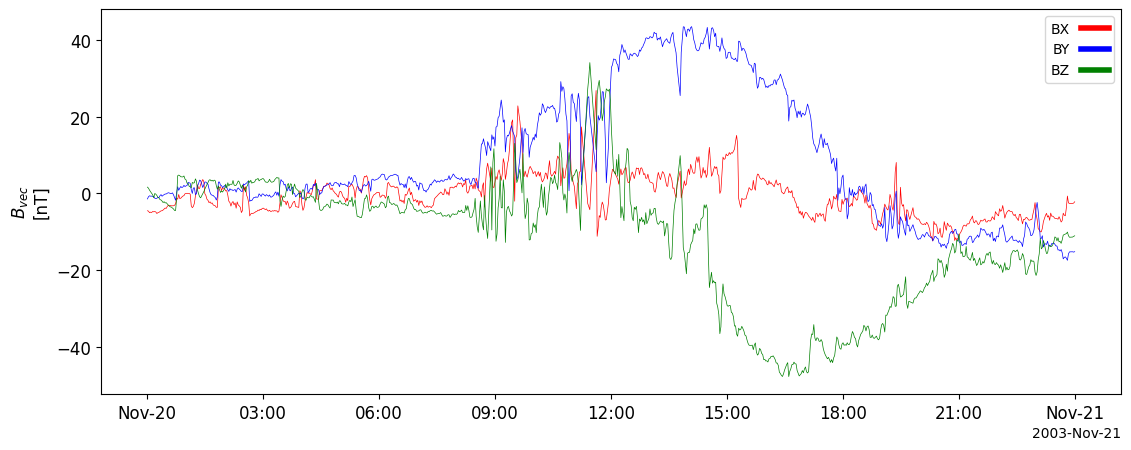

In [16]:
pytplot.tplot_options("show_all_axes",True)
pytplot.tplot(['Bmag'])

**BMAG**

In [121]:
import numpy as np

def bmag(bx,by,bz):
    b_mag = np.sqrt((bx**2)+(by**2)+(bz**2))

    return b_mag
def vp(vx,vy,vz):
    v_p = np.sqrt((vx**2)+(vy**2)+(vz**2))

    return v_p


    
    

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
df = pd.read_csv('WI_H1_SWE_1364164.csv')
df.head()

,EPOCH_yyyy-mm-ddThh:mm:ss.sssZ,P+_VX_MOMENT_km/s,P+_VY_MOMENT_km/s,P+_VZ_MOMENT_km/s,P+_WPAR_MOMENT_km/s,P+_N_MOMENT_cm^{-3},BX_nT,BY_nT,BZ_nT
0,2003-11-20T00:01:12.248Z,-443.770,13.85830,-30.3427,61.7658,3.63443,-4.50061,-1.424970,1.654920
1,2003-11-20T00:02:49.401Z,-431.468,8.45127,-26.8771,76.8411,2.87789,-4.60287,-0.843551,1.377210
2,2003-11-20T00:04:26.554Z,-433.741,9.06470,-27.3600,78.4490,2.38412,-5.00291,-0.604163,0.860529
3,2003-11-20T00:06:03.707Z,-428.475,8.59441,-29.1389,69.1899,2.86521,-4.85810,-0.703512,0.440883
4,2003-11-20T00:07:40.861Z,-429.103,9.16198,-24.6847,70.6165,2.75868,-4.95705,-0.684132,0.052745


In [124]:
df = df.rename(columns={'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ': 'dtrange'})
df['dtrange'] = pd.to_datetime(df['dtrange'])

In [125]:
df.head()

,dtrange,P+_VX_MOMENT_km/s,P+_VY_MOMENT_km/s,P+_VZ_MOMENT_km/s,P+_WPAR_MOMENT_km/s,P+_N_MOMENT_cm^{-3},BX_nT,BY_nT,BZ_nT
0,2003-11-20 00:01:12.248000+00:00,-443.770,13.85830,-30.3427,61.7658,3.63443,-4.50061,-1.424970,1.654920
1,2003-11-20 00:02:49.401000+00:00,-431.468,8.45127,-26.8771,76.8411,2.87789,-4.60287,-0.843551,1.377210
2,2003-11-20 00:04:26.554000+00:00,-433.741,9.06470,-27.3600,78.4490,2.38412,-5.00291,-0.604163,0.860529
3,2003-11-20 00:06:03.707000+00:00,-428.475,8.59441,-29.1389,69.1899,2.86521,-4.85810,-0.703512,0.440883
4,2003-11-20 00:07:40.861000+00:00,-429.103,9.16198,-24.6847,70.6165,2.75868,-4.95705,-0.684132,0.052745


In [127]:
df.columns

Index(['dtrange', 'P+_VX_MOMENT_km/s', 'P+_VY_MOMENT_km/s',
       'P+_VZ_MOMENT_km/s', 'P+_WPAR_MOMENT_km/s', 'P+_N_MOMENT_cm^{-3}',
       'BX_nT', 'BY_nT', 'BZ_nT'],
      dtype='object')

In [128]:
b_magnitude = bmag(df['BX_nT'],df['BY_nT'],df['BZ_nT'])
vp_magnitude = vp(df['P+_VX_MOMENT_km/s'],df['P+_VY_MOMENT_km/s'],df['P+_VZ_MOMENT_km/s'])
bm = pd.DataFrame({"Bmag":b_magnitude})
vp_mag = pd.DataFrame({"vp":vp_magnitude})

In [129]:
bm,vp_mag

(          Bmag
 0     5.002478
 1     4.877981
 2     5.112204
 3     4.928534
 4     5.004314
 ..         ...
 849  19.342743
 850  19.185493
 851  19.128494
 852  19.078623
 853  18.856118
 
 [854 rows x 1 columns],
              vp
 0    445.021960
 1    432.386907
 2    434.697589
 3    429.550655
 4    429.910061
 ..          ...
 849  551.141094
 850  538.630737
 851  541.532197
 852  543.792139
 853  544.177721
 
 [854 rows x 1 columns])

In [130]:
df2 = pd.concat([df,bm,vp_mag],ignore_index=True,axis=1)

In [131]:
df2.columns= ['dtrange', 'P+_VX_MOMENT_km/s', 'P+_VY_MOMENT_km/s',
       'P+_VZ_MOMENT_km/s', 'P+_WPAR_MOMENT_km/s', 'P+_N_MOMENT_cm^{-3}',
       'BX_nT', 'BY_nT', 'BZ_nT',"Bmag","Vp"]

In [132]:
print(df2.isna().sum())

df2

dtrange                0
P+_VX_MOMENT_km/s      0
P+_VY_MOMENT_km/s      0
P+_VZ_MOMENT_km/s      0
P+_WPAR_MOMENT_km/s    0
P+_N_MOMENT_cm^{-3}    0
BX_nT                  0
BY_nT                  0
BZ_nT                  0
Bmag                   0
Vp                     0
dtype: int64


,dtrange,P+_VX_MOMENT_km/s,P+_VY_MOMENT_km/s,P+_VZ_MOMENT_km/s,P+_WPAR_MOMENT_km/s,P+_N_MOMENT_cm^{-3},BX_nT,BY_nT,BZ_nT,Bmag,Vp
0,2003-11-20 00:01:12.248000+00:00,-443.770,13.85830,-30.34270,61.7658,3.63443,-4.50061,-1.424970,1.654920,5.002478,445.021960
1,2003-11-20 00:02:49.401000+00:00,-431.468,8.45127,-26.87710,76.8411,2.87789,-4.60287,-0.843551,1.377210,4.877981,432.386907
2,2003-11-20 00:04:26.554000+00:00,-433.741,9.06470,-27.36000,78.4490,2.38412,-5.00291,-0.604163,0.860529,5.112204,434.697589
3,2003-11-20 00:06:03.707000+00:00,-428.475,8.59441,-29.13890,69.1899,2.86521,-4.85810,-0.703512,0.440883,4.928534,429.550655
4,2003-11-20 00:07:40.861000+00:00,-429.103,9.16198,-24.68470,70.6165,2.75868,-4.95705,-0.684132,0.052745,5.004314,429.910061
...,...,...,...,...,...,...,...,...,...,...,...
849,2003-11-20 23:49:39.426000+00:00,-550.853,13.84110,-11.22060,53.9594,14.55950,-2.45241,-15.726300,-10.991400,19.342743,551.141094
850,2003-11-20 23:51:16.580000+00:00,-538.598,4.18577,-4.21240,45.6254,14.05290,-2.60935,-15.207600,-11.401900,19.185493,538.630737
851,2003-11-20 23:56:08.039000+00:00,-541.429,8.44821,-6.35503,55.4226,15.66020,-2.58392,-15.182600,-11.345100,19.128494,541.532197
852,2003-11-20 23:57:45.192000+00:00,-543.663,8.41431,-8.34460,65.1575,14.29960,-2.50239,-15.270000,-11.160600,19.078623,543.792139


In [94]:
np.sqrt((-4.50061)**2 + (-1.42497)**2 + (1.65492)**2 )


5.002478393696468

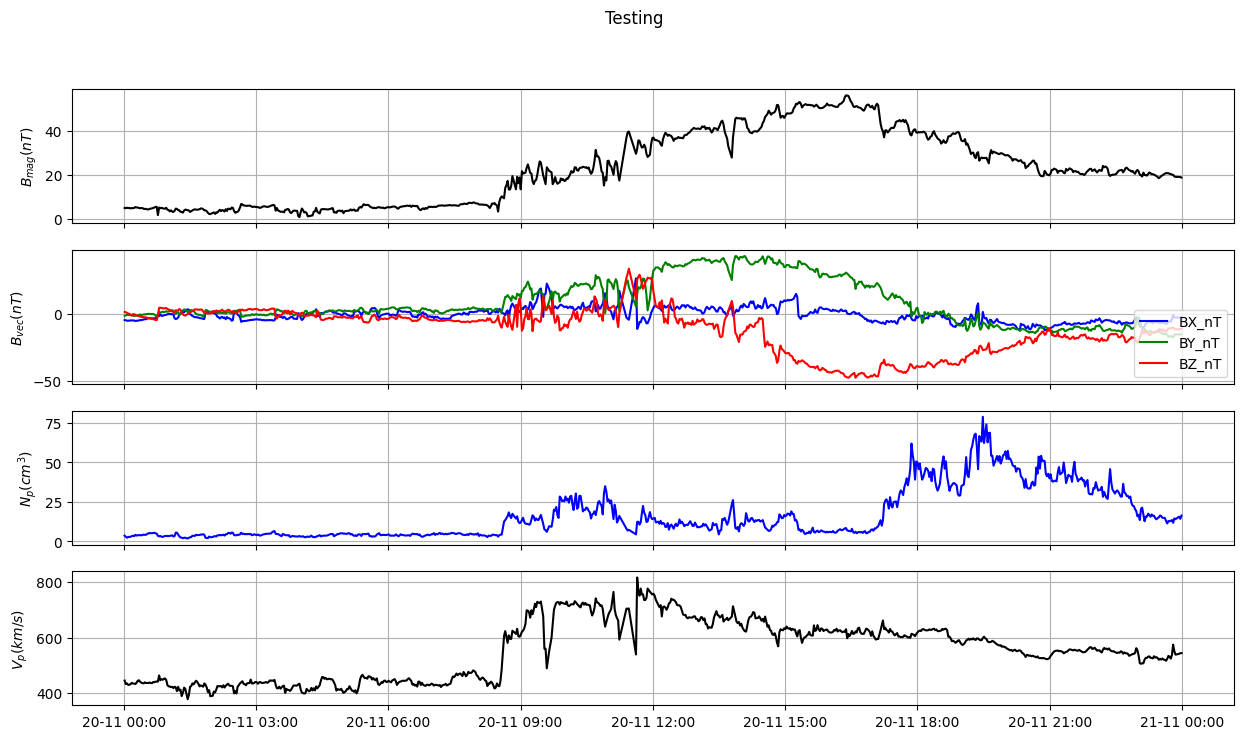

In [135]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(15, 8))

for col, color in zip(df2.columns[10:],['black']):
    axs[3].plot(df2['dtrange'], df2[col], label=col, color=color)

for col, color in zip(df2.columns[9:],['black']):
    axs[0].plot(df2['dtrange'], df2[col], label=col, color=color)
    

for col, color in zip(df2.columns[6:], ['blue', 'green', 'red']):
    axs[1].plot(df2['dtrange'], df2[col], label=col, color=color)

# plt.grid(axis='x')

# plt.grid(True)


for col, color in zip(df2.columns[5:6], ['blue']):
    axs[2].plot(df2['dtrange'], df2[col], label=col, color=color)


for ax in axs:
    ax.grid(True)

# axs[0].legend(loc="upper right")
axs[0].set_ylabel(r'$B_{mag} (nT)$')

axs[1].legend(loc="lower right")
axs[1].set_ylabel(r'$B_{vec} (nT)$')

axs[2].set_ylabel(r'$N_p (cm^{3})$')
# axs[2].legend(loc="upper right")

axs[3].set_ylabel(r'$V_p (km/s)$')
# axs[3].legend(loc="upper right")

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m %H:%M'))


plt.suptitle('Testing')

plt.show()

In [31]:
import numpy as np
test = pd.DataFrame({
    'x' : [1,2,3],
    'y' : [5,6,7]
})

In [32]:
test

,x,y
0,1,5
1,2,6
2,3,7


In [33]:
test2 = np.sqrt((test['x']**2) * (test['y']**2))

In [34]:
test2

0     5.0
1    12.0
2    21.0
dtype: float64